In [2]:
import pandas as pd

In [5]:
import numpy as np

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"D:\Downloads\t20_ score _prediction.csv")
df

,Match ID,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
0,1,7,1,11.04,Away,3,Bowling,Sunny,82
1,2,20,10,11.87,Home,5,Bowling,Sunny,204
2,3,15,7,6.14,Home,7,Balanced,Sunny,105
3,4,11,8,8.84,Home,9,Batting,Cloudy,121
4,5,8,0,9.56,Home,2,Balanced,Sunny,104
...,...,...,...,...,...,...,...,...,...
1495,1496,15,8,9.82,Home,3,Bowling,Overcast,113
1496,1497,2,10,13.41,Home,9,Balanced,Sunny,29
1497,1498,3,6,7.21,Home,1,Batting,Overcast,40
1498,1499,17,6,8.81,Away,5,Bowling,Overcast,116


In [7]:
df.isna().sum()

Match ID             0
Overs Played         0
Wickets Lost         0
Run Rate             0
Home/Away            0
Opponent Strength    0
Pitch Condition      0
Weather              0
Predicted Score      0
dtype: int64

<Axes: >

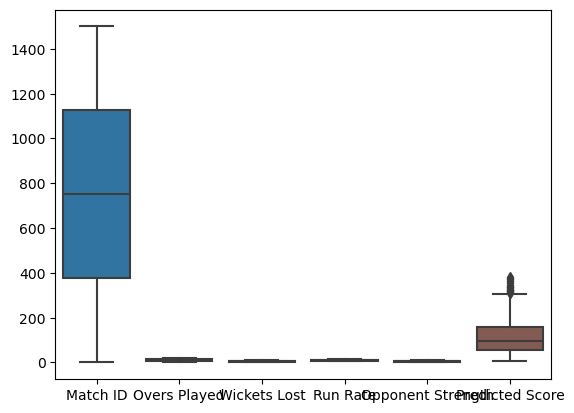

In [8]:
sns.boxplot(data = df)

## Treating outliers using winzorizing technniqur

In [15]:
for i in df:
    if df[i].dtype in ('float64','int64'):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q1 - q3
        ll = q1 - 1.5*iqr
        ul = q3 + 1.5*iqr
        df[i].clip(upper = ul, lower = ll, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match ID           1500 non-null   int64  
 1   Overs Played       1500 non-null   int64  
 2   Wickets Lost       1500 non-null   int64  
 3   Run Rate           1500 non-null   float64
 4   Home/Away          1500 non-null   object 
 5   Opponent Strength  1500 non-null   int64  
 6   Pitch Condition    1500 non-null   object 
 7   Weather            1500 non-null   object 
 8   Predicted Score    1500 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ KB


<Axes: >

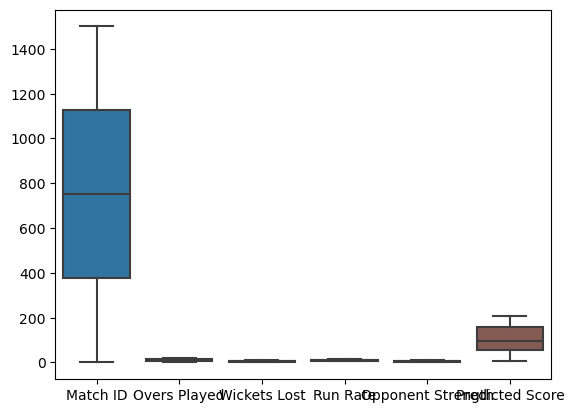

In [16]:
sns.boxplot(data = df)

# Data Partation

In [18]:
a = df.drop(['Match ID','Home/Away','Pitch Condition','Weather'], axis = 1)
a

,Overs Played,Wickets Lost,Run Rate,Opponent Strength,Predicted Score
0,7,1,11.04,3,82.0
1,20,10,11.87,5,204.0
2,15,7,6.14,7,105.0
3,11,8,8.84,9,121.0
4,8,0,9.56,2,104.0
...,...,...,...,...,...
1495,15,8,9.82,3,113.0
1496,2,10,13.41,9,29.0
1497,3,6,7.21,1,40.0
1498,17,6,8.81,5,116.0


In [19]:
a = a.rename(columns={'Overs Played':'overs_played','Wickets Lost':'wickets_lost','Run Rate':'run_rate','Opponent Strength':'opponent_strength','Predicted Score':'predicted_score'})
a

,overs_played,wickets_lost,run_rate,opponent_strength,predicted_score
0,7,1,11.04,3,82.0
1,20,10,11.87,5,204.0
2,15,7,6.14,7,105.0
3,11,8,8.84,9,121.0
4,8,0,9.56,2,104.0
...,...,...,...,...,...
1495,15,8,9.82,3,113.0
1496,2,10,13.41,9,29.0
1497,3,6,7.21,1,40.0
1498,17,6,8.81,5,116.0


In [20]:
x = a.drop('predicted_score', axis =1)
y = a[['predicted_score']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state = 15)

In [26]:
train = pd.concat([x_train, y_train], axis = 1)
train.head()

,overs_played,wickets_lost,run_rate,opponent_strength,predicted_score
1020,20,9,14.08,2,207.5
1406,13,7,12.54,1,207.5
298,3,0,11.33,6,67.0
1187,1,7,7.11,4,15.0
235,1,3,7.81,10,16.0


# correlation

In [27]:
correlation = train.corr()
correlation

,overs_played,wickets_lost,run_rate,opponent_strength,predicted_score
overs_played,1.000000,0.049454,0.029466,-0.031464,0.843412
wickets_lost,0.049454,1.000000,-0.000640,0.010796,-0.021428
run_rate,0.029466,-0.000640,1.000000,-0.078192,0.425712
opponent_strength,-0.031464,0.010796,-0.078192,1.000000,-0.095653
predicted_score,0.843412,-0.021428,0.425712,-0.095653,1.000000


In [28]:
correlation.style.applymap(lambda x : 'background-color : yellow' if x > 0.7 else '')

,overs_played,wickets_lost,run_rate,opponent_strength,predicted_score
overs_played,1.000000,0.049454,0.029466,-0.031464,0.843412
wickets_lost,0.049454,1.000000,-0.000640,0.010796,-0.021428
run_rate,0.029466,-0.000640,1.000000,-0.078192,0.425712
opponent_strength,-0.031464,0.010796,-0.078192,1.000000,-0.095653
predicted_score,0.843412,-0.021428,0.425712,-0.095653,1.000000


<Axes: >

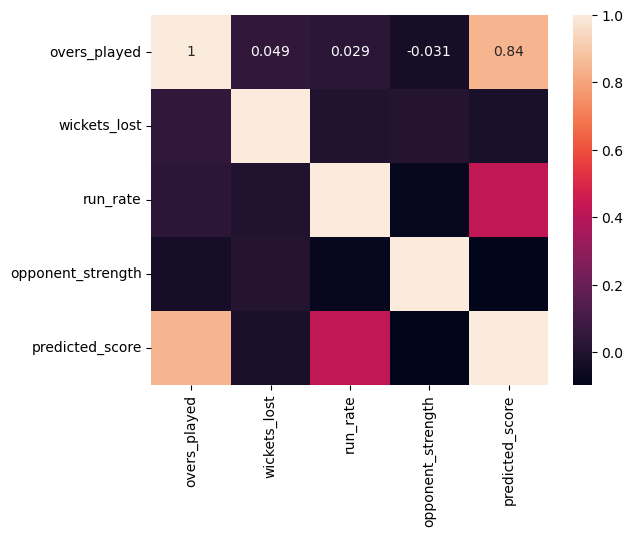

In [30]:
sns.heatmap(correlation, annot = True)

## 84 % strong corr b/w Predicted score and overs played

In [31]:
from sklearn.linear_model import LinearRegression

## VIF Varience Inflation Facto

In [40]:
# from statsmodels.stats.outliers_influence import varience_influence_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x1 = a.drop(['predicted_score'], axis = 1)
series_before = pd.Series([variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])], index = x1.columns)

In [42]:
series_before

overs_played         3.535990
wickets_lost         3.169927
run_rate             5.803409
opponent_strength    3.711084
dtype: float64

## Multi- colinearity is not Present in Dataset

## Model Builiding

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [45]:
lreg = LinearRegression()

In [46]:
model = sfs(lreg , n_features_to_select=3 , direction = 'forward', scoring = 'r2')
model

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3,
                          scoring='r2')

In [47]:
model.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3,
                          scoring='r2')

In [48]:
model.feature_names_in_

array(['overs_played', 'wickets_lost', 'run_rate', 'opponent_strength'],
      dtype=object)

In [49]:
model.get_feature_names_out()

array(['overs_played', 'wickets_lost', 'run_rate'], dtype=object)

## Method - 2 Sklearn

In [51]:
x_train = x_train.loc[:,['overs_played', 'wickets_lost', 'run_rate']]
x_train.head()

,overs_played,wickets_lost,run_rate
1020,20,9,14.08
1406,13,7,12.54
298,3,0,11.33
1187,1,7,7.11
235,1,3,7.81


In [52]:
train = pd.concat([x_train, y_train], axis = 1)
train.head()

,overs_played,wickets_lost,run_rate,predicted_score
1020,20,9,14.08,207.5
1406,13,7,12.54,207.5
298,3,0,11.33,67.0
1187,1,7,7.11,15.0
235,1,3,7.81,16.0


In [53]:
model3 = LinearRegression()

In [54]:
model3.fit(x_train, y_train)

LinearRegression()

In [56]:
np.round(model3.intercept_,2) # B0

array([-58.88])

In [58]:
np.round(model3.coef_,3)   # B1, B2, B3

array([[ 8.583, -1.219,  8.379]])

In [59]:
model3.feature_names_in_

array(['overs_played', 'wickets_lost', 'run_rate'], dtype=object)

## Prediction on train

In [60]:
train['fitted'] = np.round(model3.predict(x_train),2)
train.head()

,overs_played,wickets_lost,run_rate,predicted_score,fitted
1020,20,9,14.08,207.5,219.78
1406,13,7,12.54,207.5,149.24
298,3,0,11.33,67.0,61.81
1187,1,7,7.11,15.0,0.74
235,1,3,7.81,16.0,11.49


In [62]:
train['residual'] = np.round(train.predicted_score - train.fitted,2)
train.head()

,overs_played,wickets_lost,run_rate,predicted_score,fitted,residual
1020,20,9,14.08,207.5,219.78,-12.28
1406,13,7,12.54,207.5,149.24,58.26
298,3,0,11.33,67.0,61.81,5.19
1187,1,7,7.11,15.0,0.74,14.26
235,1,3,7.81,16.0,11.49,4.51


## Accuracy

In [63]:
from sklearn.metrics import r2_score

In [65]:
r2 = r2_score(train.predicted_score , train.fitted)
r2* 100

87.60633146160352

## Loss / Cost / Error Function - RMSE

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
model_mse = mean_squared_error(train['predicted_score'] , train['fitted'])

In [68]:
model_rmse = np.sqrt(model_mse)
model_rmse

21.17939285068884

### Assumption of model

## 1.linearity

<Axes: xlabel='wickets_lost', ylabel='predicted_score'>

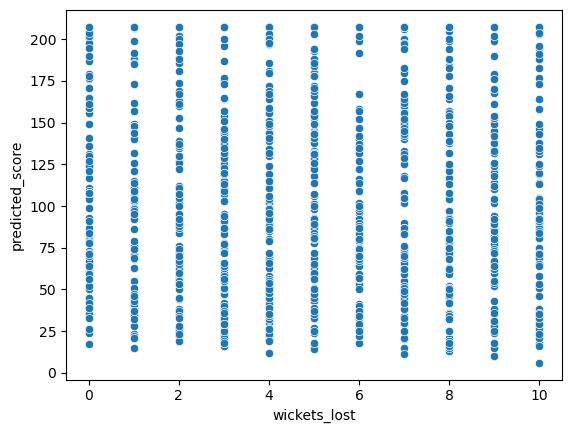

In [71]:
sns.scatterplot(x= 'wickets_lost', y = 'predicted_score', data = train)

## 2. Homoscadasticity

<Axes: xlabel='fitted', ylabel='residual'>

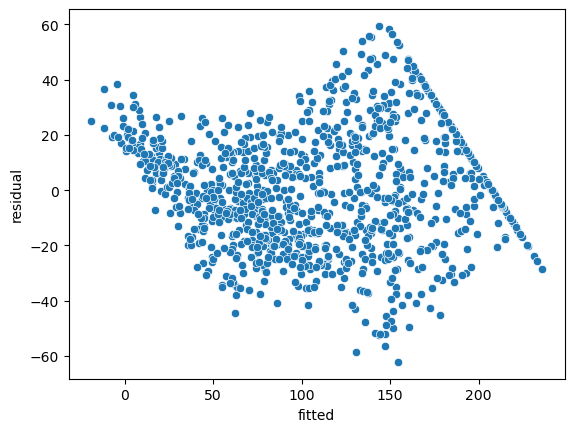

In [72]:
sns.scatterplot(x = 'fitted', y = 'residual', data = train)

## 3.Normality

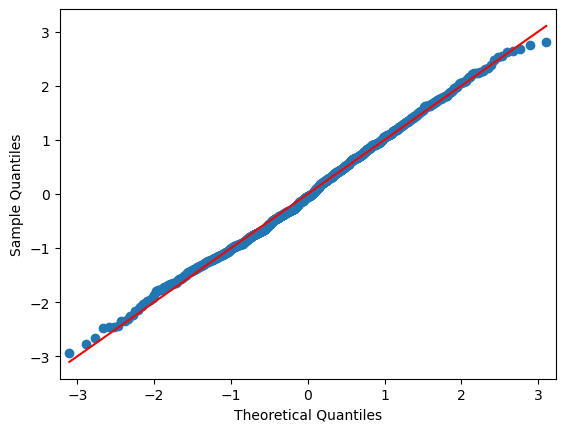

In [73]:
import statsmodels.api as sm
fig = sm.qqplot(train['residual'], fit=True, line='s') # s indicate standardized line
import matplotlib.pyplot as plt
plt.show()

## 4.Model Error are IID

<Axes: ylabel='Frequency'>

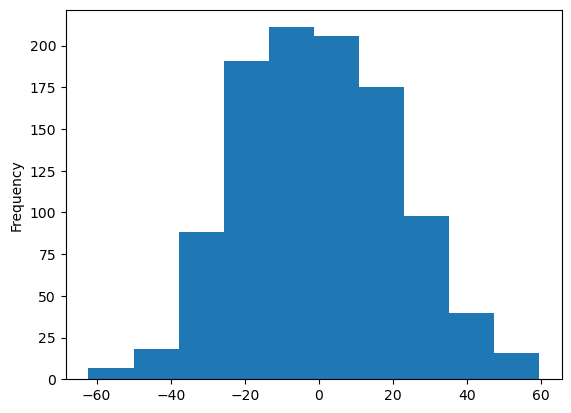

In [74]:
train['residual'].plot.hist()

<Axes: xlabel='residual', ylabel='Count'>

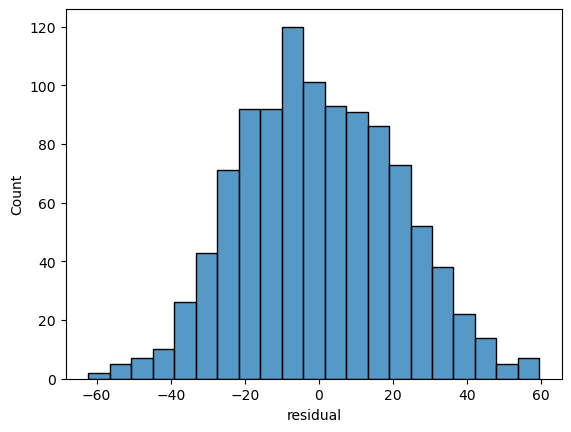

In [75]:
sns.histplot(x= 'residual', data = train)

## Prediction on test data

In [76]:
model3.feature_names_in_

array(['overs_played', 'wickets_lost', 'run_rate'], dtype=object)

In [83]:
x_test = x_test.loc[:,['overs_played', 'wickets_lost', 'run_rate']] 
x_test.head()

,overs_played,wickets_lost,run_rate
906,19,9,11.16
793,3,7,11.07
103,3,2,8.89
346,5,9,6.12
883,8,4,6.18


In [85]:
test = pd.concat([x_test, y_test], axis = 1)
test.head()

,overs_played,wickets_lost,run_rate,predicted_score
906,19,9,11.16,157.0
793,3,7,11.07,48.0
103,3,2,8.89,46.0
346,5,9,6.12,35.0
883,8,4,6.18,71.0


In [86]:
test['fitted'] = np.round(model3.predict(x_test),2)

In [87]:
test['residual'] = np.round(test.predicted_score - test.fitted,2)

In [88]:
test.head()

,overs_played,wickets_lost,run_rate,predicted_score,fitted,residual
906,19,9,11.16,157.0,186.73,-29.73
793,3,7,11.07,48.0,51.09,-3.09
103,3,2,8.89,46.0,38.92,7.08
346,5,9,6.12,35.0,24.34,10.66
883,8,4,6.18,71.0,56.69,14.31


In [91]:
test_r2 = r2_score(test.predicted_score , test.fitted)
test_r2*100

86.29739224233542

In [95]:
r2*100  #(Training accuracy)

87.60633146160352

## Loss Function (RMSE)

In [96]:
test_mosel_mse = mean_squared_error(test.predicted_score , test.fitted)

In [97]:
test_model_rmse = np.sqrt(test_mosel_mse)

In [98]:
test_model_rmse

22.654924100512893